# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

### 1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
# Importando os pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Baixando a base
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
# Avaliando as numéricas relevantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [4]:
# Separando as variáveis de interesse
df_quant = df[['qtd_filhos','idade','tempo_emprego','qt_pessoas_residencia','renda']]

In [5]:
# Montando a matriz de correlação
df_quant.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


C:\Users\berna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\berna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\berna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\berna\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

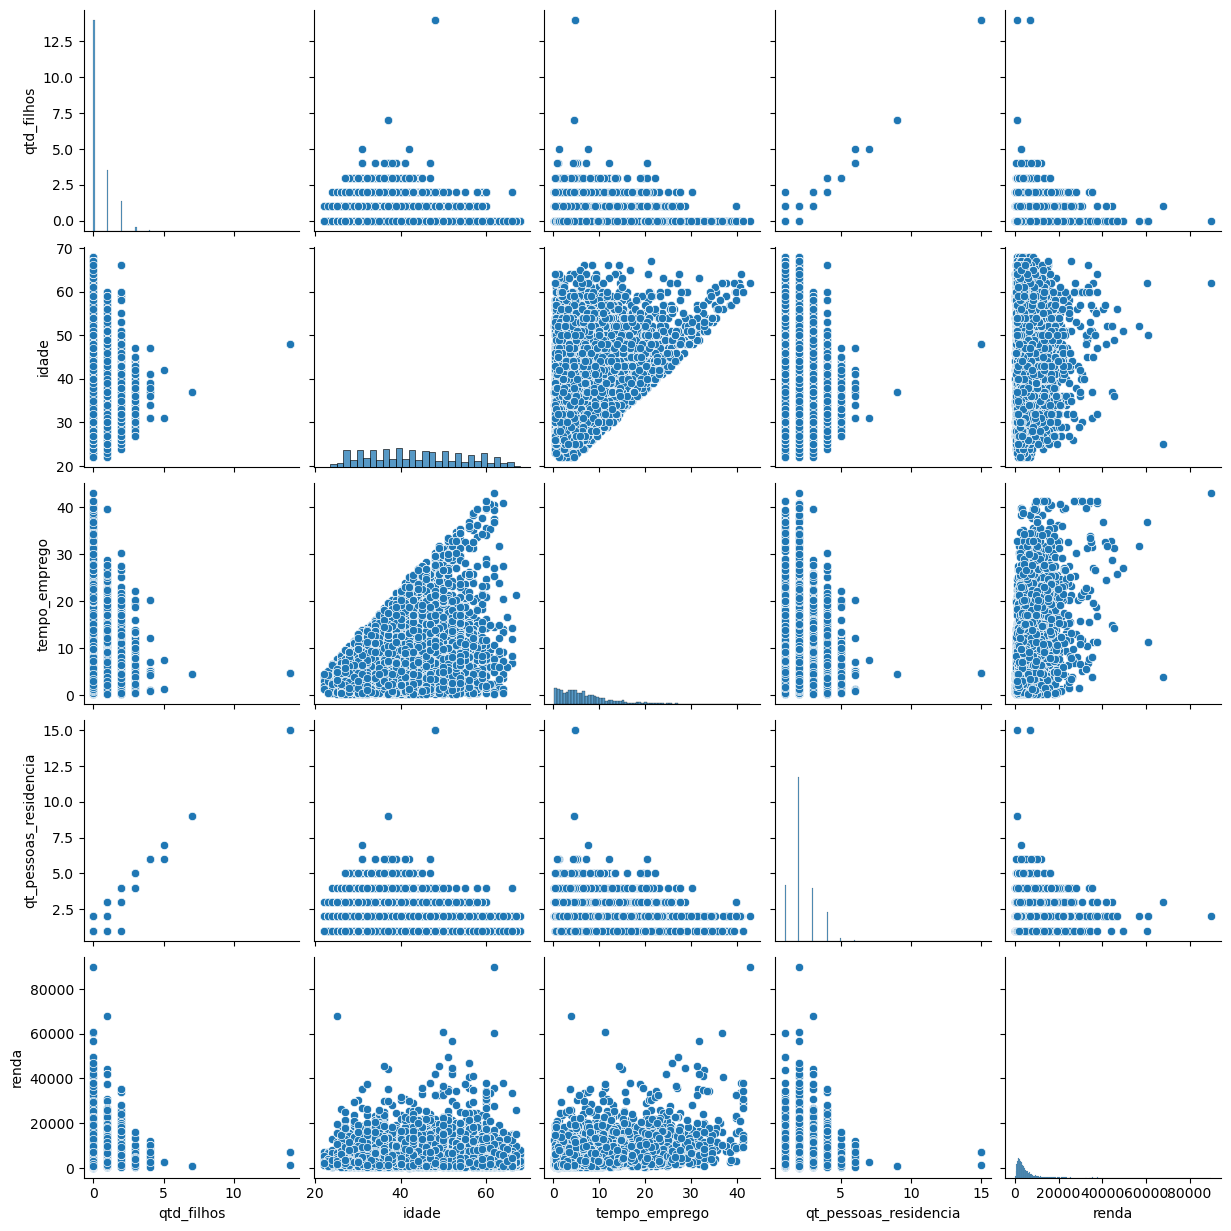

In [6]:
# Montando os gráficos de matriz de dispersão
sns.pairplot(df_quant)

 <span style="color: blue;">**CONCLUSÃO**:

1. Um padrão fácil de identificar com essa lógica é que a "quantidade de filhos" e "quantidade de pessoas na residência" são as variáveis que se correlacionam com mais força (corr = 0.896488).

2. Algo curioso de se observar (e que faz bastante sentido) que o gráfico que cruza "idade" com "tempo de emprego" tem um limite muito bem desenhado. Isso faz perfeito sentido, pois nossa idade limita o nosso tempo máximo de trabalho.

### 2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

As variáveis mais correlacionadas com <span style="color: orange;">**renda**</span> são:
1. **<span style="color: purple;">tempo de emprego</span>**: corr = 0.394235
2. **<span style="color: green;">idade</span>**: corr = 0.042570

Obs: Apesar da correlação entre **<span style="color: green;">idade</span>** e <span style="color: orange;">**renda**</span> não ser grande, ainda é maior do que as demais opções.

Vamos aos gráficos:

<Axes: xlabel='tempo_emprego', ylabel='renda'>

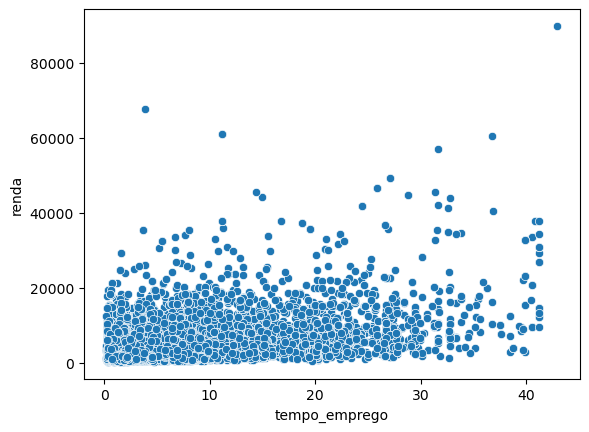

In [7]:
sns.scatterplot(y = 'renda',
                x = 'tempo_emprego',
                data = df_quant)

 **CONCLUSÃO**:

Na o scatterplot de **<span style="color: orange;">renda</span> X <span style="color: purple;">tempo de emprego</span>** vemos que a maior concentração dos clientes se encontra no quadrante com  <span style="color: orange;">**renda**</span> abaixo de 2000 e  <span style="color: purple;">**tempo de emprego**</span> abaixo de 25 anos. 

<Axes: xlabel='idade', ylabel='renda'>

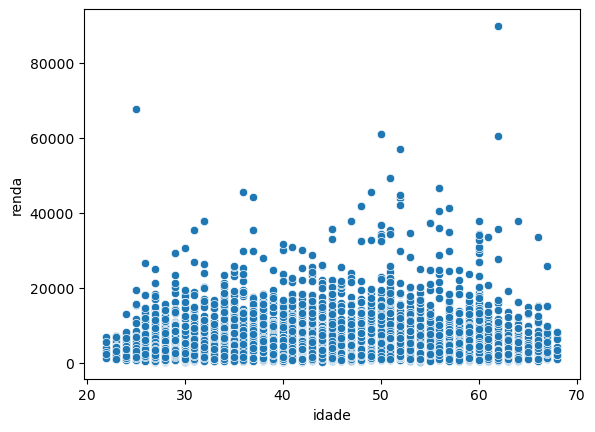

In [8]:
sns.scatterplot(y = 'renda',
                x = 'idade',
                data = df_quant)

 **CONCLUSÃO**:

Na o scatterplot de **<span style="color: orange;">renda</span> X <span style="color: green;">idade</span>** vemos que a distrbuição é majoritariamente uniforme, tendo menos clientes nas duas pontas: abaixo de 30 anos e acima de 60 anos de <span style="color: green;">**idade**</span>.

### 3) Na su aopinião, há outliers na variável renda?

**RESPOSTA**:

Sim. É possível notar claramente nos dois gráficos acima que há pontos que se destacam muito dos demais no eixo y (renda). Esses podem ser considerados Outliers.

### 4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [9]:
# Calculando o logaritimo

df_quant2 = df_quant
df_quant2['log_renda'] = np.log(df_quant2['renda'])

C:\Users\berna\AppData\Local\Temp\ipykernel_9948\824959810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quant2['log_renda'] = np.log(df_quant2['renda'])


In [10]:
df_quant2[['idade','tempo_emprego','renda','log_renda']].corr()

,idade,tempo_emprego,renda,log_renda
idade,1.000000,0.323934,0.042570,0.024712
tempo_emprego,0.323934,1.000000,0.394235,0.379556
renda,0.042570,0.394235,1.000000,0.835734
log_renda,0.024712,0.379556,0.835734,1.000000


<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

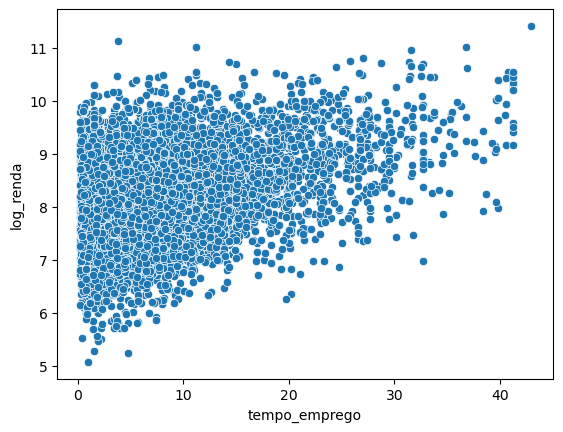

In [11]:
sns.scatterplot(y = 'log_renda',
                x = 'tempo_emprego',
                data = df_quant2)

<Axes: xlabel='idade', ylabel='log_renda'>

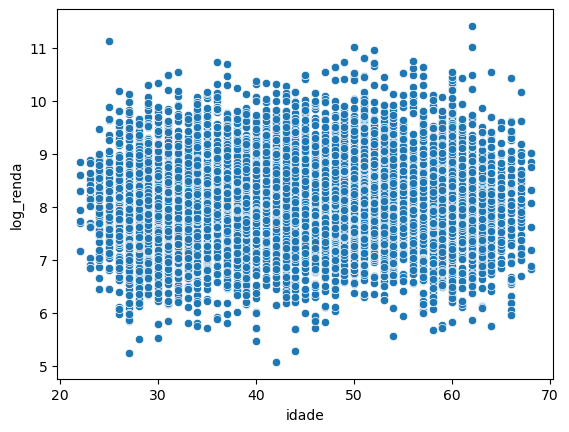

In [12]:
sns.scatterplot(y = 'log_renda',
                x = 'idade',
                data = df_quant2)

## 5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Acredito que a aplicação do LOG melhorou a análise, pois pelo gráfico podemos observar muito mais nitidamente as correlações nas variáveis:

A  **<span style="color: orange;">renda</span>** cresce conforme o **<span style="color: purple;">tempo de emprego</span>** e tem pouca alteração em relação a **<span style="color: green;">idade</span>**.

Esses comportamentos observados no gráfico fazem bastante sentido, já que a correlação **<span style="color: orange;">renda</span>** com <span style="color: purple;">tempo de emprego</span>** é de **0.394235** e a correlação de **<span style="color: orange;">renda</span>**  com **<span style="color: green;">idade</span>** é de **0.042570**.